### <u>Problem Statement</u>: <a id='top' />
##### A healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identification of disease and have medical intervention if necessary. This would help not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked. 
##### As a data scientist, you are required to construct a classification model based on the available data and evaluate its efficacy. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; checking for any correlations; creating a model; evaluating the performance of the classification model. Visualizations would be a value add. 

> Important Points to be considered
> - Missing Data may be represented by either NAs, Blanks or values such as -999/-99 etc. Please check for various possibilities. 
> - Results can be varying from team to team. But, you should be able to justify your result. 


### EDA (Exploratory Data Analysis)

> ###### - [Target Column](#target_col): Visualizing Distribution.
> ###### - [Missing Data](#missing_data): Check on features with Missing data.
> ###### - [Univariate Analysis](#univariate): Plot the features distribution to identify skewness.
> ###### - [Bivariate Analysis](#bivariate): Plot the features against <u> Target </u> to visualize the relation.
> ###### - [Multicolinearity check](#multicolinearity): Identify if any features which are correlated with other features.

### Data Preprocessing.

> ###### - [Data Imputation](#imputer): Imputing the missing values.
> ###### - [Data scaling/normalization](#scaling): Normalizing/ Scaling the data features.

### Select Train/Test data.

> ###### - [Train-Test split](#train_test): Splitting the data into training set and testing set. Split ratio: 70 (training):30 (testing)

### Training the model.

> ###### - [Training Model](#modelling): Training differnt models on training set.

### Model Evaluation.

> ###### - [Model Evaluation](#model_eval): Evaluating the performance of the model and finalizing the model.

•	Any interesting observations
•	Challenges faced and how you mitigated the challenges
•	Assumptions if any



In [104]:
# Imports
# For data analysis and wrangling
import pandas as pd
import numpy as np
import os
import random

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import reuse_function as reuse
import importlib
importlib.reload(reuse)

# For Data imputation
from sklearn import impute
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.preprocessing import Imputer

In [11]:
# Reading the provided data
raw_df = pd.read_csv(r'C:\Users\agupt84\Desktop\ML\Mtech\Semester - I\DM - Data Mining\assignment\Assignment_DelhiBatch\coronary-heart-disease-prediction\data.csv')

In [12]:
# Visualizing the data head in tabular form
raw_df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,123,230,27,330,0,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,1,1,27,1,0,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,1,2,27,2,0,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,24,42,27,71,0,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,0,2,27,2,0,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [13]:
# Looking at columns counts, nulls, Dtypes and Index range
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
ID        34281 non-null int64
IV        34281 non-null int64
A1        34281 non-null int64
A2        32538 non-null float64
A3        34281 non-null int64
A4        34281 non-null int64
A5        34281 non-null int64
A6        34281 non-null int64
A7        34281 non-null int64
A8        34281 non-null int64
A9        34281 non-null int64
A10       34281 non-null int64
A11       34281 non-null int64
A12       34281 non-null int64
A13       34281 non-null int64
A14       34281 non-null int64
A15       34281 non-null float64
A16       34281 non-null float64
A17       34281 non-null int64
A18       34281 non-null int64
A19       34281 non-null int64
A20       34281 non-null int64
A21       34281 non-null float64
A22       34281 non-null int64
Target    34281 non-null int64
dtypes: float64(4), int64(21)
memory usage: 6.5 MB


In [14]:
# Creating a copy of Raw DF for EDA
df_eda = raw_df.copy()

### EDA (Exploratory Data Analysis)

#### 1. <u>Target column</u>: Visualizing distribution <a id='target_col'/>

   Target  Counts    pct
0       0   22988  67.06
1       1   11293  32.94


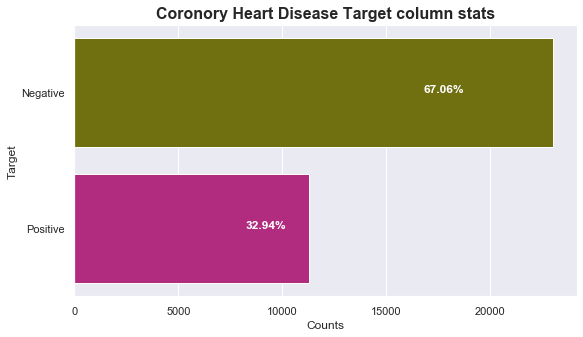

In [66]:
sns.set(style="darkgrid")
targetcoldf = raw_df.groupby('Target').agg({'Target':['count']}).reset_index()
targetcoldf.columns = ['Target','Counts']
targetcoldf['pct'] = round(targetcoldf['Counts']/(len(raw_df))*100,2)
palette = ['olive','mediumvioletred']
print (targetcoldf.head())
fig, ax = plt.subplots(figsize=(9,5))
fig = sns.barplot(x='Counts', y='Target',data=targetcoldf, ci = None, orient='h', palette=palette)

y_lab = ['Negative', 'Positive']
ax.set_yticklabels(labels=y_lab, ha='right')

for i, v in enumerate(targetcoldf['pct']):
    ax.text(v*250, i, str(v)+'%', color='white', fontweight='bold')

plt.title('Coronory Heart Disease Target column stats',size = 16, weight = 'bold')
plt.ylabel('Target')
plt.xlabel('Counts');


##### <u>Observation</u>:
> The Target column distribution looks fine.

#### 2. <u>Missing Data</u>: Check on features with Missing data. <a id='missing_data' />

In [7]:
def get_missing_data_stats(df):
    missing_data = df.isin([-99, -999, np.nan]).sum()
    per_missing_data = round(missing_data/len(df)*100,2).sort_values(ascending=False)
    if (len(per_missing_data[per_missing_data > 0]) > 0):
        print ('Below are columns with correspondind missing data %s:')
        print ('-----------------------------------------------------')
        print ('Column ~ Missing %')
        print ('-------------------')
        print (per_missing_data[per_missing_data > 0])
        print ('-------------------')

        plt.subplots(figsize=(9,9))
        sns.heatmap(df.isin([-99, -999, np.nan]))
        plt.show()
    else:
        print ('------------------------------')
        print ('No column has missing data :-)')
        print ('------------------------------')

Below are columns with correspondind missing data %s:
-----------------------------------------------------
Column ~ Missing %
-------------------
A15    6.51
A16    6.13
A2     5.08
dtype: float64
-------------------


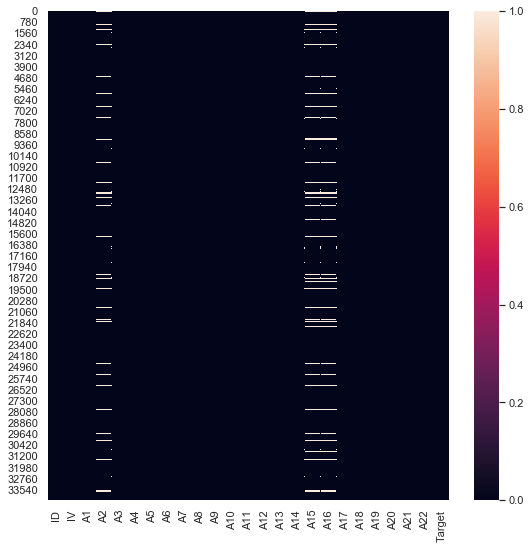

In [9]:
get_missing_data_stats(raw_df)

##### <u><b>Observation</b></u> :
> A2, A15 & A16 columns have missing data of ~5%. It needs to be imputed during Data Preprocessing section.

#### Univariate Analysis - Plot the features distribution to identify skewness.<a id='univariate' />

In [23]:
raw_df.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

 
----------------------------------------------------------
 Analyzing Column : ID
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 34281
ID  to be rejected due to lot of subcategories.


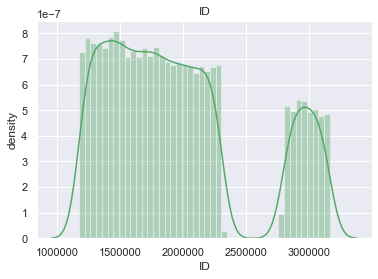

ID  is NOT skewed
 
----------------------------------------------------------
 Analyzing Column : IV
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1897


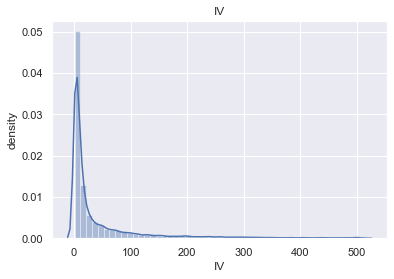

IV  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A1
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 777


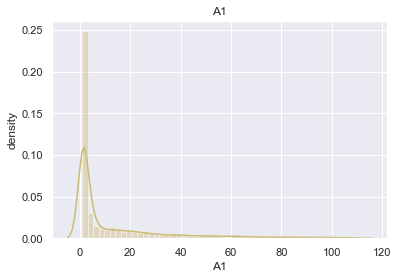

A1  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A2
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 24


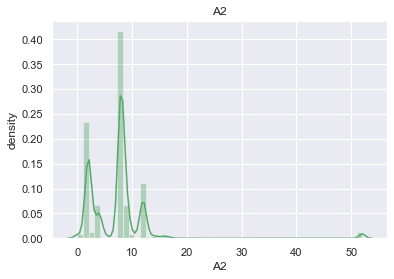

A2  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A3
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 606


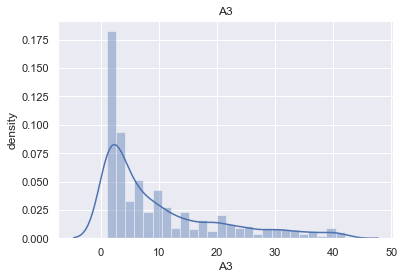

A3  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A4
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 169


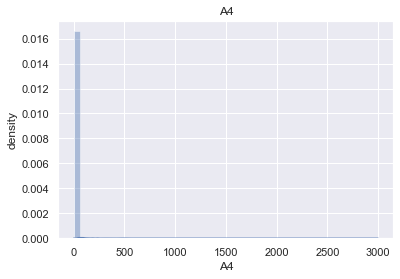

A4  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A5
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1248


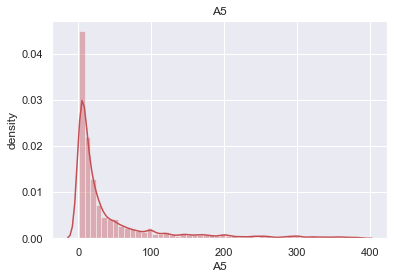

A5  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A6
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1639


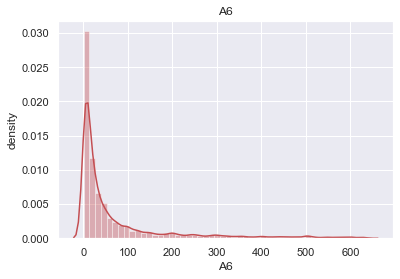

A6  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A7
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1956


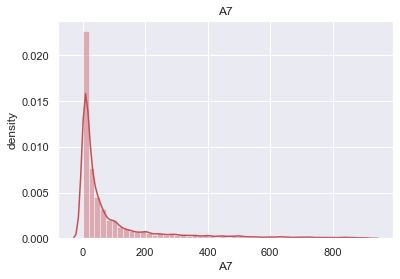

A7  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A8
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 791


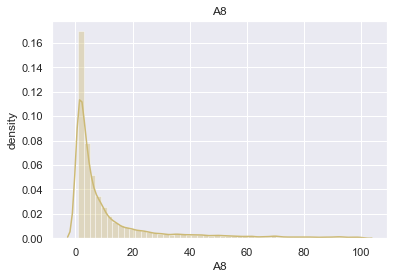

A8  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A9
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1368


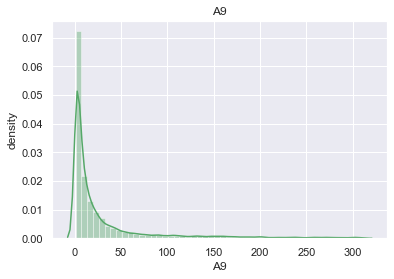

A9  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A10
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1867


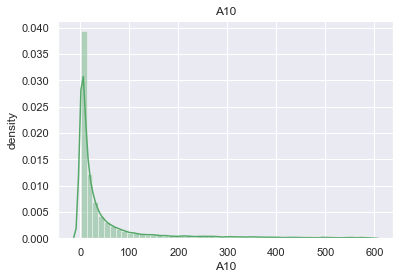

A10  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A11
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 1
A11  to be rejected due to NO variation.


C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


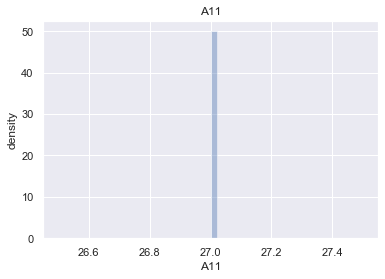

A11  is NOT skewed
 
----------------------------------------------------------
 Analyzing Column : A12
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2230


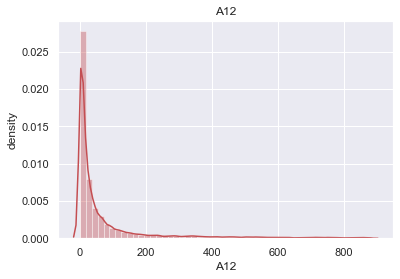

A12  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A13
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


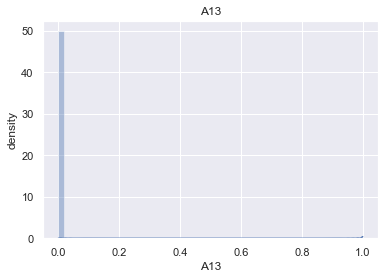

A13  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A14
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 156


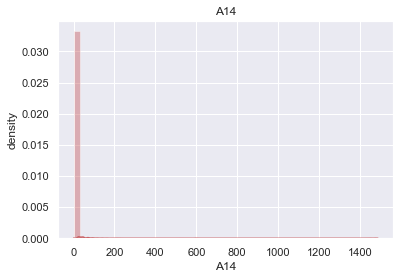

A14  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A15
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 102


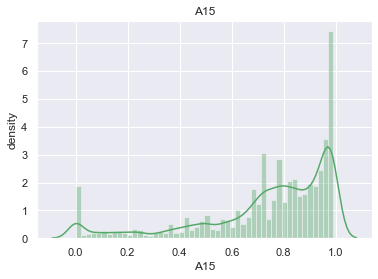

A15  is left skewed and needs square treatment
 
----------------------------------------------------------
 Analyzing Column : A16
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 102


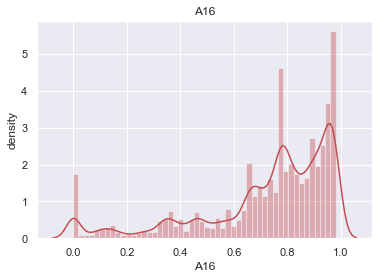

A16  is left skewed and needs square treatment
 
----------------------------------------------------------
 Analyzing Column : A17
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


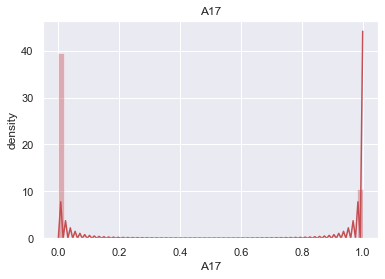

A17  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A18
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


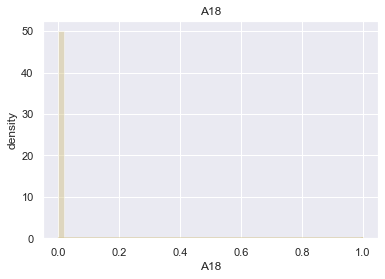

A18  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A19
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


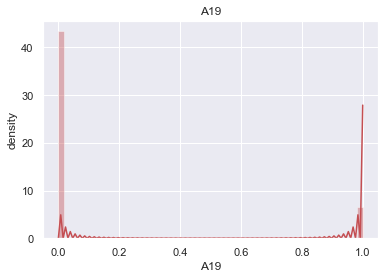

A19  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : A20
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


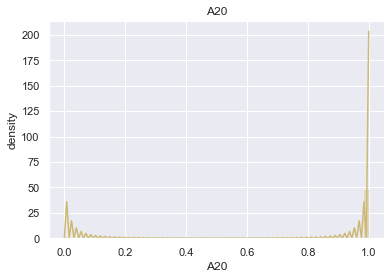

A20  is left skewed and needs square treatment
 
----------------------------------------------------------
 Analyzing Column : A21
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 34220
A21  to be rejected due to lot of subcategories.


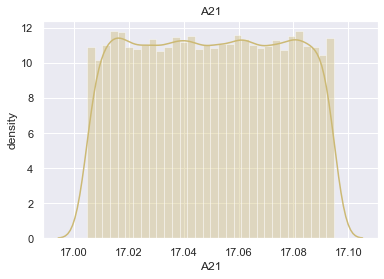

A21  is NOT skewed
 
----------------------------------------------------------
 Analyzing Column : A22
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


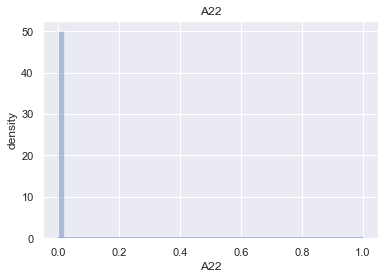

A22  is Right skewed and needs logarithmic scaling
 
----------------------------------------------------------
 Analyzing Column : Target
----------------------------------------------------------
Total length of dataframe : 34281
Unique values/categories : 2


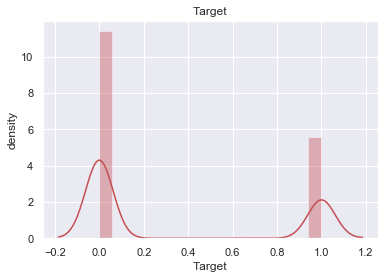

Target  is NOT skewed
----------------------------------------------------------
---------------------- FINAL STATS -----------------------
----------------------------------------------------------
Below columns to be rejected due to lot of unique subcategories i.e. more than 1/4th of unique sub categories :
['ID', 'A11', 'A21']
Below columns are highly skewed towards right :
['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A13', 'A14', 'A17', 'A18', 'A19', 'A22']
Below columns are highly skewed towards left :
['A15', 'A16', 'A20']


In [57]:
import random
sns.set(color_codes=True)
colors = ['y','b','g','r']
df_length = len(raw_df)
rej_many_sub_cats_col = []
right_skewed_col = []
left_skewed_col = []

for col in raw_df.columns:
    print (' ')
    print ('----------------------------------------------------------')
    print (' Analyzing Column :', col)
    print ('----------------------------------------------------------')
    
    no_of_subcats = len(raw_df[col].value_counts())
    print ('Total length of dataframe :', df_length)
    print ('Unique values/categories :', no_of_subcats)
    if (df_length/no_of_subcats < 4):
        rej_many_sub_cats_col.append(col)
        print (col , ' to be rejected due to lot of subcategories.')
    if (no_of_subcats == 1):
        rej_many_sub_cats_col.append(col)
        print (col , ' to be rejected due to NO variation.')
    
    # Distribution plot
    df_numerical = raw_df
    df_numerical[col] = df_numerical[col].dropna()
    df_percentile = df_numerical.loc[(df_numerical[col] < np.percentile(df_numerical[col],95)) & (df_numerical[col] > np.percentile(df_numerical[col],5)), [col]]          
    if (len(df_percentile) == 0):
        dplot = sns.distplot(df_numerical[col].dropna(), color=random.choice(colors))
    else:
        dplot = sns.distplot(df_percentile[col].dropna(), color=random.choice(colors))
    #dplot = sns.distplot(df_numerical[col].dropna(), color=random.choice(colors))
    dplot.set_title(col)
    dplot.set_xlabel(col)
    dplot.set_ylabel("density")
    #plt.savefig("plots/univariate/dplot_" + str(i) + ".png")
    plt.show()
    
    #check skewness
    skewchk = raw_df[col].skew(axis=0, skipna=True)
    if skewchk > 1:
        right_skewed_col.append(col)
        print (col ,' is Right skewed and needs logarithmic scaling')
    elif skewchk < -1:
        left_skewed_col.append(col)
        print (col ,' is left skewed and needs square treatment')
    else:
        print (col , ' is NOT skewed')
    
print ('----------------------------------------------------------')
print ('---------------------- FINAL STATS -----------------------')
print ('----------------------------------------------------------')
print ('Below columns to be rejected due to lot of unique subcategories i.e. more than 1/4th of unique sub categories :')
print (rej_many_sub_cats_col)
print ('Below columns are highly skewed towards right :')
print (right_skewed_col)
print ('Below columns are highly skewed towards left :')
print (left_skewed_col)

### Observations:
> - Below columns to be rejected due to lot of unique subcategories i.e. more than 1/4th of unique sub categories :
> > 'ID', 'A11', 'A21'
> - Below columns are highly <u>Right skewed</u>:
> > 'IV', 'A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12'
> - Below columns are highly <u>Left skewed</u>::
> > 'A15', 'A16'
> - A2 (may have outlier), A4 & A14 (95% data belongs to 0 value), Categorical Type: A13, A17 A18, A19, A20, A22 

##### Bivariate plot <a id='bivariate' />

In [109]:
raw_df.columns

Index(['ID', 'IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'Target'],
      dtype='object')

In [117]:
# Categorical columns
df_cat = raw_df[['A2','A13','A17','A18','A19','A20','A22','Target']]
# df_cat['Target'] = raw_df[['Target']]

                                                                                   
                                                                                   
====== GENERATING STATS FOR A2: ================
      A2  count  PERCENTAGE
7    8.0  14091   41.104402
1    2.0   7887   23.006913
11  12.0   3738   10.903999
3    4.0   2269    6.618827
8    9.0   2259    6.589656
2    3.0    419    1.222251
23  52.0    413    1.204749
====== CROSSTAB STATS FOR A2: ================
---------------------------------------
A2       2.0  3.0   4.0    8.0   9.0  12.0  52.0    All
Target                                                 
0       4430  215  1794   9347  1723  2714   391  20614
1       3457  204   475   4744   536  1024    22  10462
All     7887  419  2269  14091  2259  3738   413  31076
====== CHI2 STATS For A2: ================
---------------------------------------
Below are Chi-2 test results
dof=6
probability=0.950, critical=12.592, chi2_stat=886.277
Dependent (reject H0

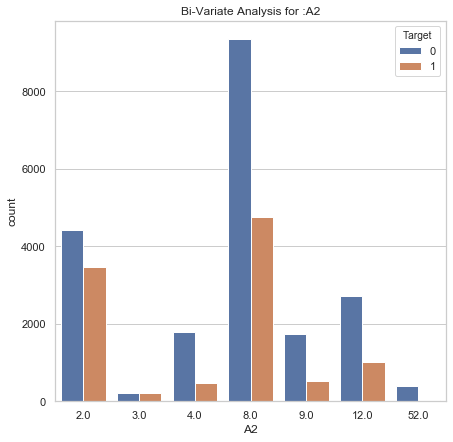

                                                                                   
                                                                                   
====== GENERATING STATS FOR A13: ================
   A13  count  PERCENTAGE
0    0  34218   99.816225
====== CROSSTAB STATS FOR A13: ================
---------------------------------------
A13         0    All
Target              
0       22976  22976
1       11242  11242
All     34218  34218
====== CHI2 STATS For A13: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fail to reject H0)


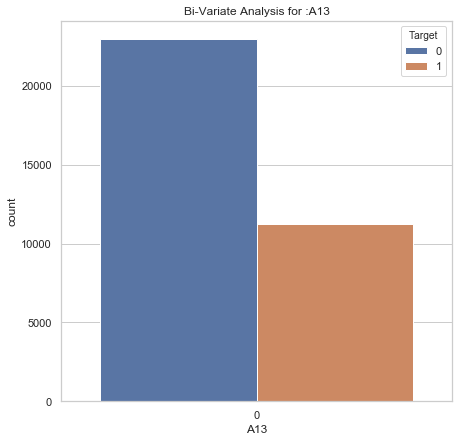

                                                                                   
                                                                                   
====== GENERATING STATS FOR A17: ================
   A17  count  PERCENTAGE
0    0  27128   79.134214
1    1   7153   20.865786
====== CROSSTAB STATS FOR A17: ================
---------------------------------------
A17         0     1    All
Target                    
0       17751  5237  22988
1        9377  1916  11293
All     27128  7153  34281
====== CHI2 STATS For A17: ================
---------------------------------------
Below are Chi-2 test results
dof=1
probability=0.950, critical=3.841, chi2_stat=154.739
Dependent (reject H0)


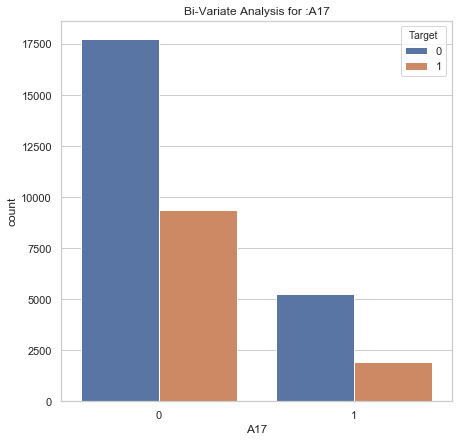

                                                                                   
                                                                                   
====== GENERATING STATS FOR A18: ================
   A18  count  PERCENTAGE
0    0  34270   99.967912
====== CROSSTAB STATS FOR A18: ================
---------------------------------------
A18         0    All
Target              
0       22985  22985
1       11285  11285
All     34270  34270
====== CHI2 STATS For A18: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fail to reject H0)


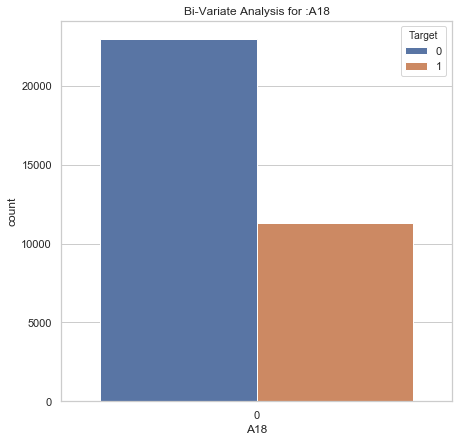

                                                                                   
                                                                                   
====== GENERATING STATS FOR A19: ================
   A19  count  PERCENTAGE
0    0  29758   86.806103
1    1   4523   13.193897
====== CROSSTAB STATS FOR A19: ================
---------------------------------------
A19         0     1    All
Target                    
0       20224  2764  22988
1        9534  1759  11293
All     29758  4523  34281
====== CHI2 STATS For A19: ================
---------------------------------------
Below are Chi-2 test results
dof=1
probability=0.950, critical=3.841, chi2_stat=83.129
Dependent (reject H0)


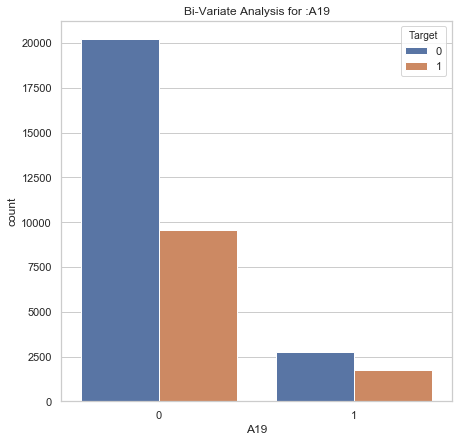

                                                                                   
                                                                                   
====== GENERATING STATS FOR A20: ================
   A20  count  PERCENTAGE
1    1  32991   96.236983
0    0   1290    3.763017
====== CROSSTAB STATS FOR A20: ================
---------------------------------------
A20        0      1    All
Target                    
0        819  22169  22988
1        471  10822  11293
All     1290  32991  34281
====== CHI2 STATS For A20: ================
---------------------------------------
Below are Chi-2 test results
dof=1
probability=0.950, critical=3.841, chi2_stat=7.563
Dependent (reject H0)


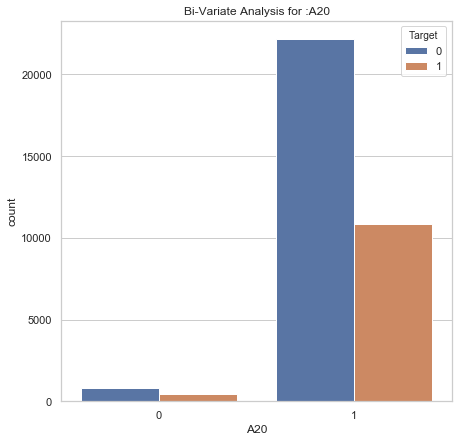

                                                                                   
                                                                                   
====== GENERATING STATS FOR A22: ================
   A22  count  PERCENTAGE
0    0  34274   99.979581
====== CROSSTAB STATS FOR A22: ================
---------------------------------------
A22         0    All
Target              
0       22981  22981
1       11293  11293
All     34274  34274
====== CHI2 STATS For A22: ================
---------------------------------------
Below are Chi-2 test results
dof=0
probability=0.950, critical=nan, chi2_stat=0.000
Independent (fail to reject H0)


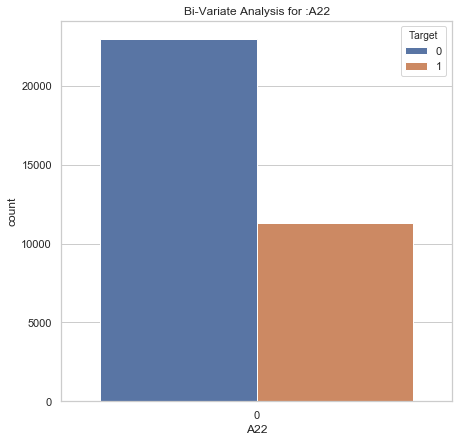

In [118]:
# Bivariate analysis
for col in df_cat.columns:
    if (col != 'Target'):
        reuse.BiVariateAnalysisForGreaterThanOnePercentVolume(df_categorical=df_cat,ColToAnalyze=col, hueCol='Target', percentage = 0)


##### 3. Check Multi-Correlation between columns using Heatmap <a id='multicolinearity' />

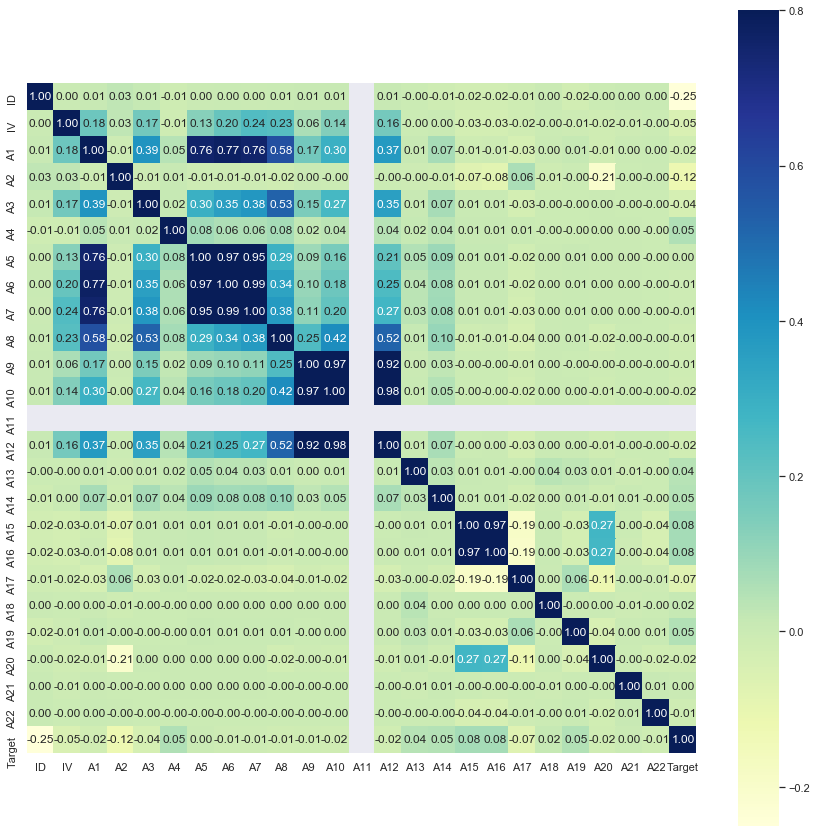

In [17]:
corr_matrix = raw_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,
           vmax=.8,
           square=True,
           annot=True,
           fmt='.2f',
           cmap='YlGnBu')

### Observations:
> Below columns to be ignored as their chi-2 correlation shows that they are independent of Target variable. 
> > 'A13', 'A18', 'A22'.

> Multi-colinearity among features:
> > Column **A5,A6,A7** are correlated with each other. Thus, **A5,A6 can be dropped.**  
> > Column **A15, A16** are also correlated with each other. Thus, **A15 can be dropped.**  
> > Columns **A9, A10, A12** are also strongly correlated with each other. Thus, **A9, A10 can be dropped.**  
 


### Data Preprocessing 

### Data Imputation <a id='imputer' />

In [119]:
df_post_eda = raw_df.copy()

In [120]:
df_post_eda.drop(columns=['ID','A11','A21','A6','A7','A16','A9','A10'], axis=1, inplace=True)
df_post_eda.head()

,IV,A1,A2,A3,A4,A5,A8,A12,A13,A14,A15,A17,A18,A19,A20,A22,Target
0,2049,44,8.0,11,0,0,38,330,0,0,0.52,0,0,0,1,0,0
1,48,0,8.0,0,0,0,1,1,0,0,0.59,1,0,0,1,0,0
2,318,2,9.0,0,0,0,0,2,0,0,0.94,1,0,0,0,0,0
3,62,4,2.0,0,0,0,7,71,0,0,0.51,0,0,0,1,0,0
4,2,0,8.0,0,0,0,0,2,0,0,0.82,0,0,0,1,0,0


In [121]:
# Impute library to imput missing data based on median

imputer = impute.SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = impute.SimpleImputer(missing_values=-99, strategy='median')
# knnimputer = impute.KNNImputer(missing_values=-99)

In [184]:
df_post_eda['A2'] = imputer.fit_transform(np.array(df_post_eda['A2']).reshape(-1,1))
df_post_eda['A15'] = imputer1.fit_transform(np.array(df_post_eda['A15']).reshape(-1,1))
# df_post_eda['A16'] = imputer1.fit_transform(np.array(df_post_eda['A16']).reshape(-1,1))

In [123]:
get_missing_data_stats(df_post_eda)

------------------------------
No column has missing data :-)
------------------------------


In [310]:
df_pre_processing = df_post_eda.copy()

In [311]:
feature_skew = df_post_eda.select_dtypes(include=[np.number]).skew()
feature_skew

IV         69.230466
A1         64.564133
A2          4.836702
A3         56.788150
A4         53.727208
A5         66.285931
A8         34.212933
A12       102.326094
A13        23.263535
A14        31.559305
A15        -1.498035
A17         1.434012
A18        55.800783
A19         2.175240
A20        -4.859587
A22        69.962235
Target      0.725879
dtype: float64

In [312]:
# log_features = ['IV', 'A1', 'A2', 'A3','A4', 'A5', 'A8', 'A12','A13']
log_features = ['A1', 'A2', 'A3','A4', 'A5', 'A8', 'A12','A13']
scale_features = ['A14']
boolean_features = ['A13', 'A17', 'A18', 'A19', 'A20', 'A22']

In [313]:
np.log(np.log(0))

C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [318]:
# df_pre_processing[log_features] = np.log10(df_pre_processing[log_features]) 
for col in log_features:
    df_pre_processing[col] = df_pre_processing[col].apply(lambda x:np.log10(x) if x > 0 else 0)

In [319]:
df_pre_processing.A1.value_counts()

0.000000    22417
0.301030     2359
0.477121      869
0.602060      582
0.698970      435
0.778151      258
0.845098      236
0.903090      198
1.113943      182
1.176091      179
1.041393      167
0.954243      152
1.301030      145
1.000000      145
1.146128      142
1.079181      138
1.204120      137
1.322219      131
1.278754      130
1.342423      129
1.255273      128
1.230449      121
1.397940      116
1.361728      104
1.414973      104
1.431364       87
1.380211       86
1.462398       86
1.477121       82
1.505150       81
1.447158       80
1.579784       69
1.544068       65
1.531479       64
1.602060       64
1.591065       61
1.491362       61
1.799341       57
1.518514       57
1.612784       57
1.568202       55
1.556303       53
1.643453       52
1.698970       50
1.662758       49
1.690196       48
1.623249       48
1.633468       47
1.672098       46
1.732394       44
1.785330       43
1.763428       42
1.653213       41
1.681241       40
1.740363       39
1.778151  

In [320]:
X = df_pre_processing.drop(axis=1, columns=['Target'])
y = df_pre_processing['Target']

In [321]:
# Standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [322]:
X_df_scaled = scaler.fit_transform(X)

In [323]:
from sklearn.model_selection import train_test_split, validation_curve

X_train, X_test, y_train, y_test = train_test_split(X_df_scaled, y, test_size=0.3, random_state=45)

### Modelling

> - Split data in train and test set
> - Fit the model
> - Check Accuarcy/Precision/Recall
> - Predict on test set and match with result 

In [324]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, classification, classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix

In [24]:
# # Seperate Target column from X and create y for Target variable
# X = df_post_eda.drop(axis=1, columns=['Target'])
# y = df_post_eda['Target']

In [25]:
# # Impute Train data
# X['A2'] = imputer.fit_transform(np.array(X['A2']).reshape(-1,1))
# X['A15'] = imputer1.fit_transform(np.array(X['A15']).reshape(-1,1))
# # X['A16'] = imputer1.fit_transform(np.array(X['A16']).reshape(-1,1))

In [26]:
X.columns

Index(['IV', 'A1', 'A2', 'A3', 'A4', 'A7', 'A8', 'A12', 'A13', 'A14', 'A15',
       'A17', 'A18', 'A19', 'A20', 'A22'],
      dtype='object')

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [325]:
print ('Train Data Shape :', X_train.shape)
print ('Test Data shape :', X_test.shape)

Train Data Shape : (23996, 16)
Test Data shape : (10285, 16)


In [326]:
model = DecisionTreeClassifier(criterion='entropy',random_state=45, max_depth=4)
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=45, splitter='best')

In [327]:
# Predict on test data
y_predict = model.predict(X=X_test)

Accuracy of classifier is : 0.8540593096742829
              precision    recall  f1-score   support

     class_0       0.87      0.91      0.89      6908
     class_1       0.81      0.73      0.77      3377

    accuracy                           0.85     10285
   macro avg       0.84      0.82      0.83     10285
weighted avg       0.85      0.85      0.85     10285



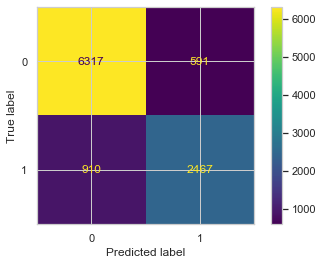

In [328]:
# validate accuracy
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict))
print (classification_report(y_true=y_test, y_pred=y_predict, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, values_format='.0f')

In [329]:
key = X_train.columns
val = model.feature_importances_
dict1 = {key[i]: val[i] for i in range(0,len(key))}

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [330]:
dict1

NameError: name 'dict1' is not defined

In [331]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

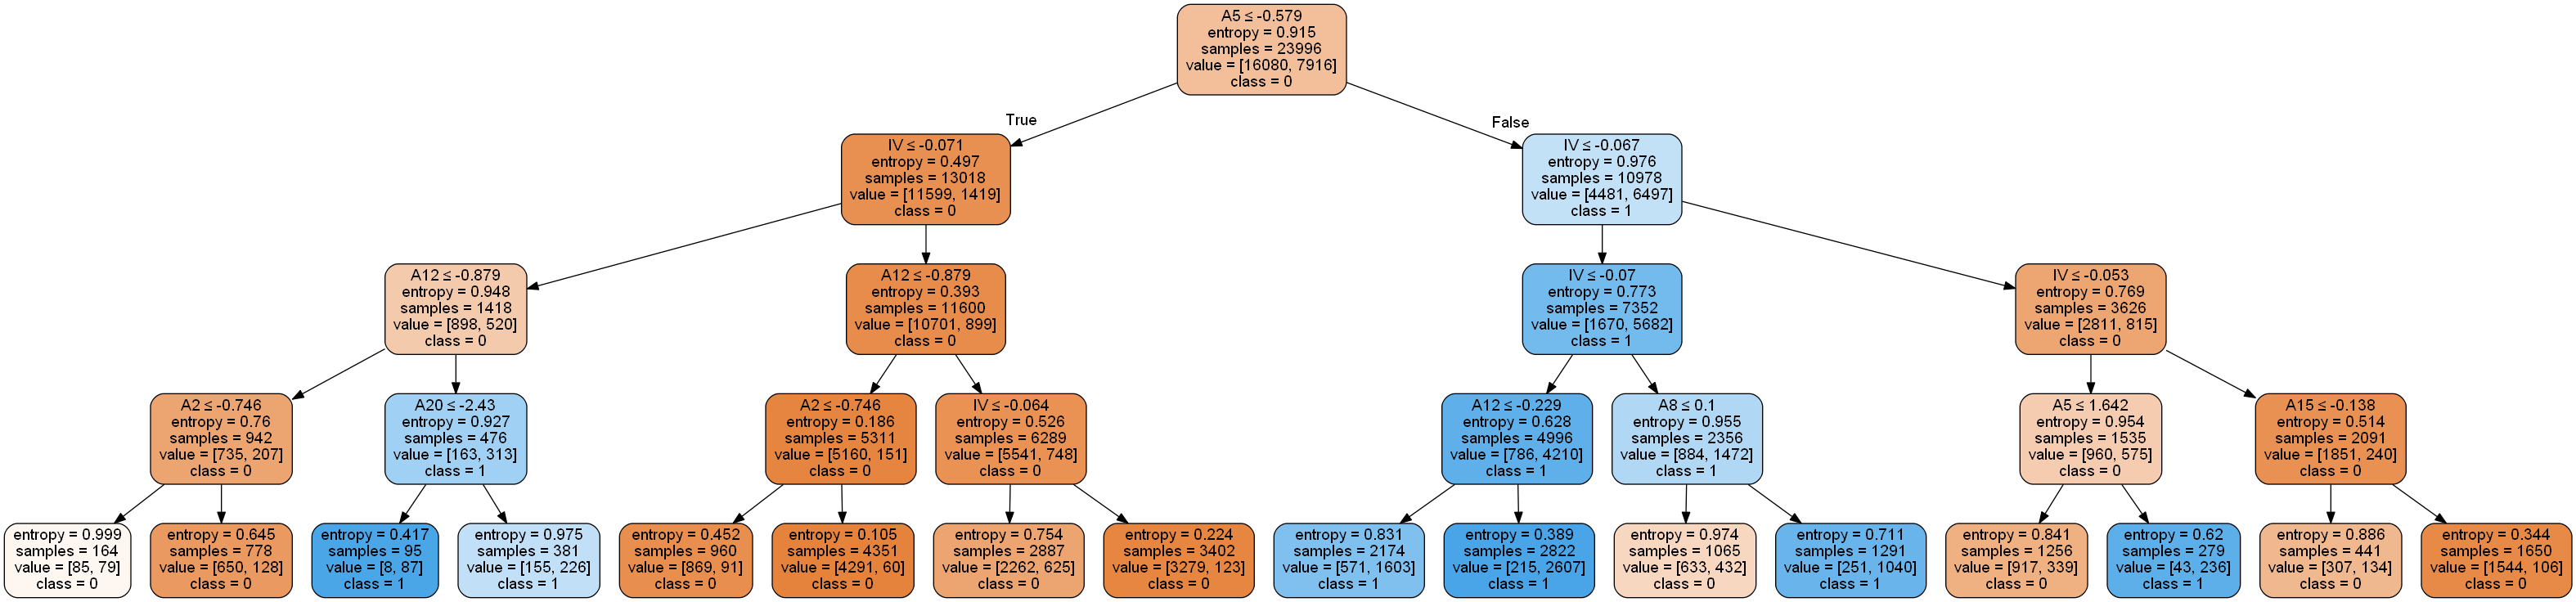

In [332]:
# Visualizing Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('coronary-heart-disease.png')
Image(graph.create_png())

In [335]:
#random forest classifier
model_rf = RandomForestClassifier(n_estimators=45, max_depth=5, random_state=45)
model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

Accuracy of classifier is : 0.8623237724842003
              precision    recall  f1-score   support

     class_0       0.89      0.91      0.90      6908
     class_1       0.80      0.77      0.79      3377

    accuracy                           0.86     10285
   macro avg       0.85      0.84      0.84     10285
weighted avg       0.86      0.86      0.86     10285



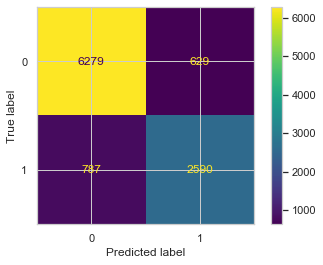

In [336]:
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X=X_test)
# validate accuracy
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict_rf))
print (classification_report(y_true=y_test, y_pred=y_predict_rf, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model_rf, X=X_test, y_true=y_test, values_format='.0f')